In [1]:
import json
serialized = """{"title" : "Data Science Book",
                 "author" : "Joel Grus",
                 "publicationYear" : 2014,
                 "topics" : ["data", "science", "data science"]}"""

deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print deserialized

{u'publicationYear': 2014, u'author': u'Joel Grus', u'topics': [u'data', u'science', u'data science'], u'title': u'Data Science Book'}


In [8]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)

[(2, 2), (4, 1), (5, 2), (6, 3), (7, 6), (8, 2), (9, 2), (11, 3), (12, 1)]
[(1, 0), (2, 2), (3, 0), (4, 1), (5, 2), (6, 3), (7, 6), (8, 2), (9, 2), (10, 0), (11, 3), (12, 1)]


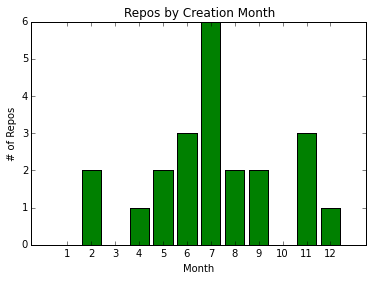

In [41]:
from dateutil.parser import parse
from collections import Counter

dates = [parse(repo["created_at"]) for repo in repos]      # each 'repo' is a dict in the list of dicts, 'repos'
month_counts = Counter(date.month for date in dates)       # month is a function available for parse objects of dateutil 
weekday_counts = Counter(date.weekday() for date in dates) # so here we have counters like {Month: Count of Months}

sorted_counts = sorted(month_counts.items())

print sorted_counts

months = range(1, 13)
for i in months:                                               # for each month
    if not [pair for pair in sorted_counts if pair[0] == i]:   # a list of tuples in sorted_counts whose first element
        sorted_counts.insert(i-1, (i,0))                       # = that month, if empty, adds a tuple of (month, 0)
print sorted_counts

months, counts = zip(*sorted_counts)

%matplotlib inline
from matplotlib import pyplot as plt

xs = [i + 0.1 for i in months]
plt.bar(xs, counts, color = 'g')

plt.ylabel("# of Repos")
plt.title("Repos by Creation Month")

plt.xticks([i + 0.5 for i in months], months)
plt.xlabel("Month")

plt.show()
